<a href="https://colab.research.google.com/github/ramakrishna12343/courses/blob/main/081_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRT-2


In [ ]:
list=[1,2,3,4,5]
print(list)
list.extend([10,12])
print(list)
list.extend([10,12])
print(list)
list.pop(0)
print(list)
for i in range (0,len(list)):
  print(list[i])
print(len(list))
list.remove(10)
print(list)
list.clear()
print(list)
list.append(10)
print(list)
list.insert(1,"hii")
print(list)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 10, 12]
[1, 2, 3, 4, 5, 10, 12, 10, 12]
[2, 3, 4, 5, 10, 12, 10, 12]
2
3
4
5
10
12
10
12
8
[2, 3, 4, 5, 12, 10, 12]
[]
[10]
[10, 'hii']


In [33]:
#Tuple and Set
a=(1,46,567,786,786)
print(a)
print(a.index(46))
print(a.count(786))

#set
s={1,56,7,85,"r",75}
print(s)
s.add(65)
print(s)
s.remove(65)
print(s)
s.discard(100)
print(s)
s.clear()
print(s)
s1={2,4,5,7}
s2={5,4,0}
print(s1.union(s2))
print(s1.intersection(s2))
print(s1.difference(s2))
print(s1.symmetric_difference(s2))

#dict

r={"ram":300,"kirshna":400}
print(r)
r.get("ram")

(1, 46, 567, 786, 786)
1
2
{1, 85, 7, 56, 75, 'r'}
{1, 65, 85, 7, 56, 75, 'r'}
{1, 85, 7, 56, 75, 'r'}
{1, 85, 7, 56, 75, 'r'}
set()
{0, 2, 4, 5, 7}
{4, 5}
{2, 7}
{0, 2, 7}
{'ram': 300, 'kirshna': 400}


300

In [ ]:
#string
#a="machine learning"
#print(a[14:4:-1])
#len(a)
a="machine learning"
#b="learning"
#a+b
b=a.upper()
print(b)
b=a.split()
print(b)
b=a.replace("machine","artificial")
print(b)

MACHINE LEARNING
['machine', 'learning']
artificial learning


In [ ]:
a=30
b=15
c=20
print(c>b or c>a)
print(c>b and c>a)

True
False


In [ ]:
a=200
b=575
c=400
print(a>b and a<=c or b>c)

True


In [ ]:
x=1
y=not x
print(y)

False


323
139
Epoch 1/5
21/21 [==============================] - 2s 14ms/step - loss: 0.7309 - accuracy: 0.4923 - val_loss: 0.6670 - val_accuracy: 0.6115
Epoch 2/5
21/21 [==============================] - 0s 4ms/step - loss: 0.6344 - accuracy: 0.6718 - val_loss: 0.6843 - val_accuracy: 0.6115
Epoch 3/5
21/21 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6718 - val_loss: 0.6783 - val_accuracy: 0.6115
Epoch 4/5
21/21 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6718 - val_loss: 0.6775 - val_accuracy: 0.6115
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6115
Training accuracy: 0.6718266010284424
Testing accuracy: 0.6115108132362366


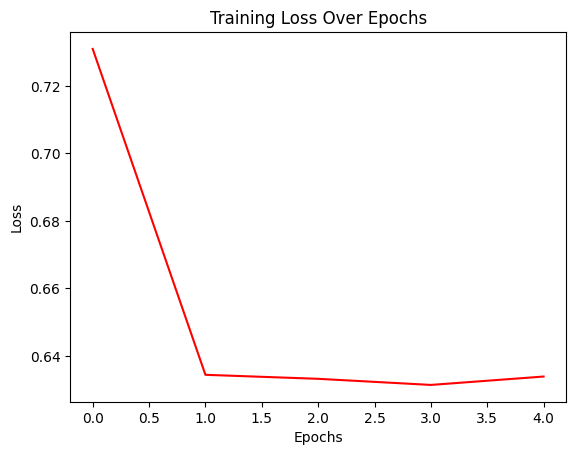

In [ ]:
import math
import pandas as pd
from keras import models, layers, optimizers
import numpy as np
import random
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load data
file_name = '/content/SAheart.csv'
data = pd.read_csv(file_name, sep=',', index_col=0)
data['famhist'] = data['famhist'] == 'Present'

# Split data into training and testing sets
n_test = int(math.ceil(len(data) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(data))), n_test)
train_ixs = [ix for ix in range(len(data)) if ix not in test_ixs]
train = data.iloc[train_ixs, :]
test = data.iloc[test_ixs, :]

print(len(train))
print(len(test))

# Define features and response
features = ['adiposity', 'age']
response = 'chd'
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

# Normalize data
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

# Convert 'Yes'/'No' (or other possible values) in y_train and y_test to 1/0
value_mapping = {'Yes': 1, 'No': 0, 'Si': 1}  # Add other mappings if necessary
y_train = y_train.replace(value_mapping).astype(int)
y_test = y_test.replace(value_mapping).astype(int)


# Define model parameters
hidden_units = 10
activation = 'sigmoid'
learning_rate = 0.01
epochs = 5
batch_size = 16

# Build model
model = models.Sequential()
model.add(layers.Dense(input_dim=len(features), units=hidden_units, activation=activation))
model.add(layers.Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate model
train_acc = model.evaluate(x_train, y_train, batch_size=batch_size)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

# Plot loss
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

R

# EXPERIMENT-3

In [ ]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return 1/ (1=+np.exp(-x)s

def forward_pass(x, weights):
    weighted_sum = np.dot(x, weights)

    output = sigmoid(weighted_sum)

    return output

def backward_pass(x, output, actual_output, weights, learning_rate):
    # Calculate error
    error = actual_output - output

    error_derivative = error * sigmoid_derivative(output)

    weights += learning_rate * error_derivative * x

    return weights, error

x = np.array([0.1, 0.2, 0.3, 0.4])

weights = np.array([0.5, -0.5, 0.3, -0.3])

actual_output = 1

learning_rate = 0.01
num_iterations = 10000

output_before = forward_pass(x, weights)

for i in range(num_iterations):
    weights, error = backward_pass(x, output_before, actual_output,
weights, learning_rate)

output_after = forward_pass(x, weights)

print("Initial Output:", output_before)
print("Updated Output:", output_after)
print("Error Difference:", error - (actual_output - output_after))
print("Updated Weights after Backward Pass:", weights)

Initial Output: 0.48001065984441826
Updated Output: 0.9734967745349465
Error Difference: 0.4934861146905283
Updated Weights after Backward Pass: [1.72787602 1.95575205 3.98362807 4.61150409]


# experiment-4.1



<ipython-input-6-88984997d460>:32: RuntimeWarning: overflow encountered in square
  total_cost = np.mean((y - y_predicted) ** 2)


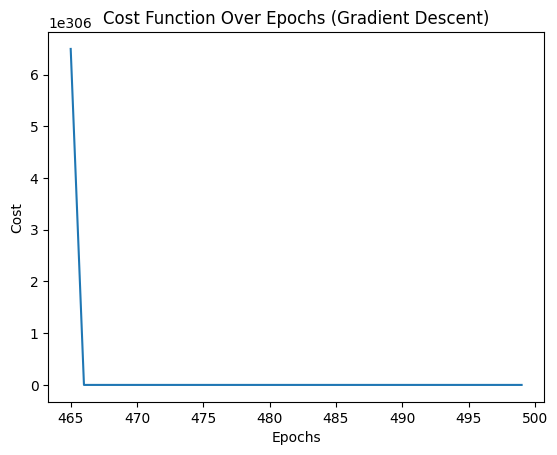

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3, 4, 3, 4, 5],
    'price': [550000, 565000, 610000, 590000, 680000]
}

X = np.array([data['area'], data['bedrooms']]).T
y = np.array(data['price'])
def gradient_descent(X, y, learning_rate=0.001, epochs=100):
    num_features = X.shape[1]
    w = np.ones(num_features)
    b = 0
    total_samples = X.shape[0]
    cost_list = []

    for epoch in range(epochs):
        y_predicted = np.dot(X, w) + b


        w_grad = -(2/total_samples) * np.dot(X.T, (y - y_predicted))


        b_grad = -(2/total_samples) * np.sum(y - y_predicted)

        w = learning_rate * w_grad
        b = learning_rate * b_grad

        total_cost = np.mean((y - y_predicted) ** 2)
        cost_list.append(total_cost)

    return w, b, cost_list

w_gd, b_gd, cost_list_gd = gradient_descent(X, y,
learning_rate=0.001, epochs=500)

plt.plot(range(len(cost_list_gd))[::-1], cost_list_gd)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Over Epochs (Gradient Descent)')
plt.show()



# EXPERIMENT-4.2


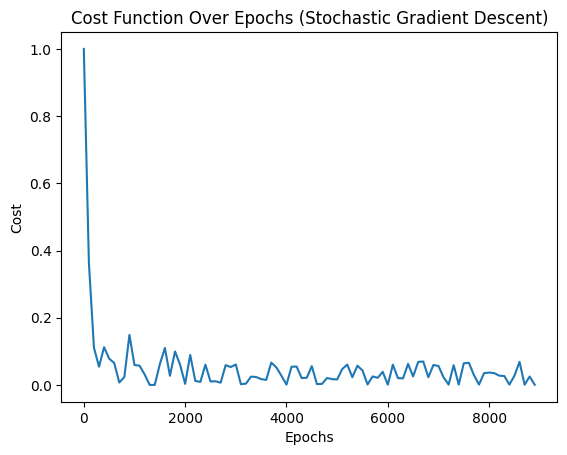

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3, 4, 3, 4, 5],
    'price': [550000, 565000, 610000, 590000, 680000]
}

X = np.array([data['area'], data['bedrooms']]).T
y = np.array(data['price'])

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y.reshape(-1, 1)).flatten()

def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features,))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = np.random.randint(0, total_samples)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x) + b

        w_grad = -(2/total_samples) * (sample_x * (sample_y - y_predicted))
        b_grad = -(2/total_samples) * (sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y - y_predicted)
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 9000)
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Over Epochs (Stochastic Gradient Descent)')
plt.show()


# Experiment 5


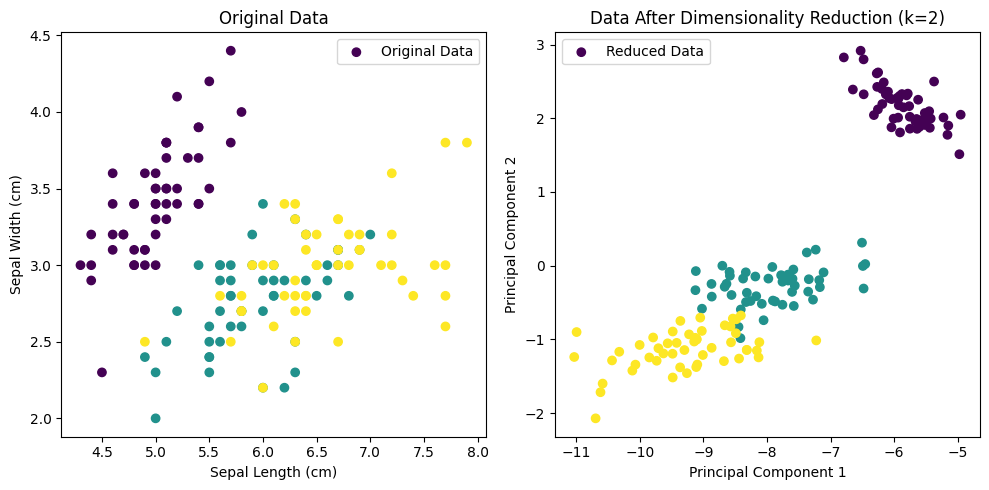

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
data = iris.data


U, S, Vt = np.linalg.svd(data, full_matrices=False)

k = 2
reduced_data = np.dot(data, Vt[:k].T)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=iris.target, cmap='viridis',
label='Original Data')
plt.title('Original Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris.target,
cmap='viridis', label='Reduced Data')
plt.title('Data After Dimensionality Reduction (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

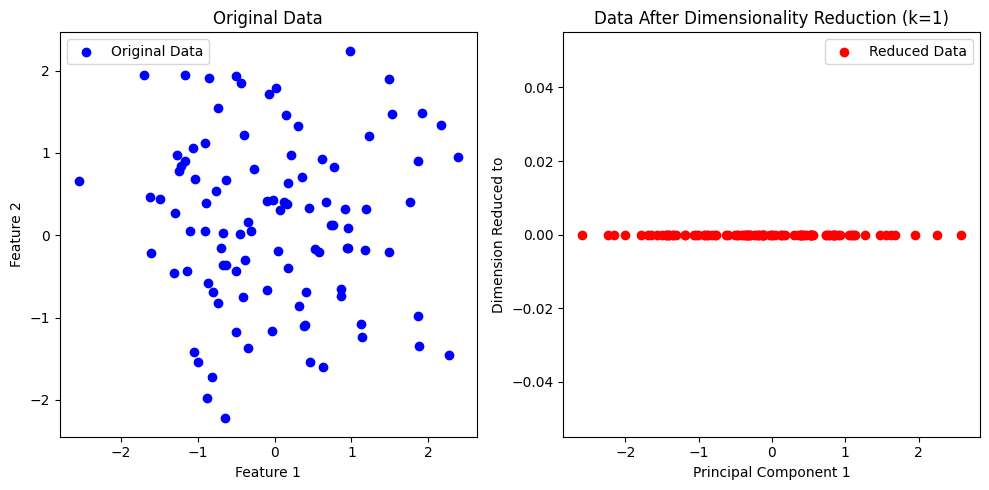

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
data = np.random.randn(100, 2)

U, S, Vt = np.linalg.svd(data, full_matrices=False)


k = 1
reduced_data = np.dot(data, Vt[:k].T)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], np.zeros_like(reduced_data),
color='red', label='Reduced Data')
plt.title('Data After Dimensionality Reduction (k=1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Dimension Reduced to')
plt.legend()
plt.tight_layout()
plt.show()

# Exercise 4.1


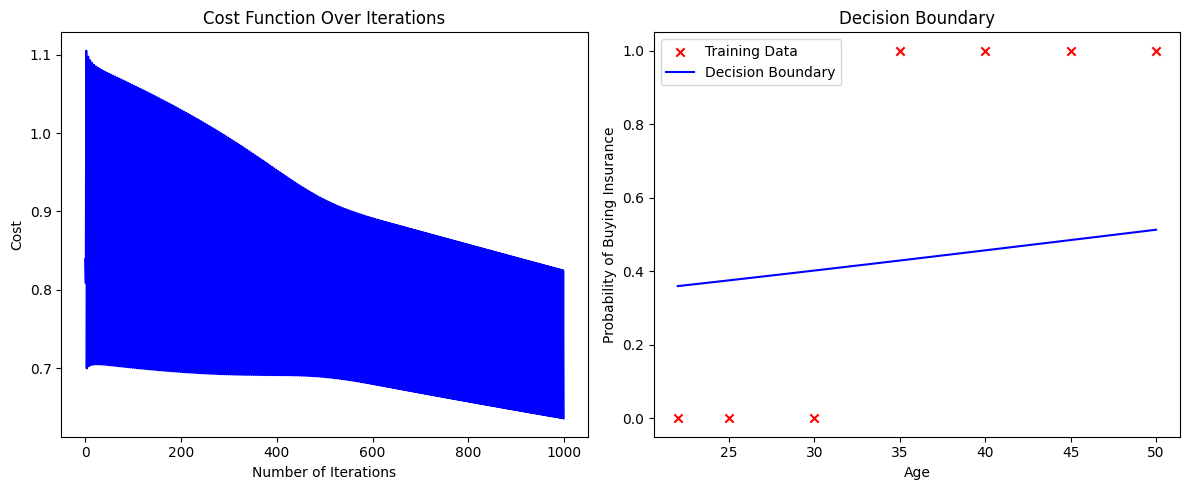

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = 1/m * np.dot(X.T, (h - y))
    return gradient


def gradient_descent(X, y, theta, alpha, num_iters):
    costs = []
    for _ in range(num_iters):
        gradient = compute_gradient(X, y, theta)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs


X = np.array([[1, 22], [1, 25], [1, 30], [1, 35], [1, 40], [1, 45], [1, 50]])
y = np.array([0, 0, 0, 1, 1, 1, 1])

theta = np.zeros(X.shape[1])
alpha = 0.01
num_iters = 1000


theta, costs = gradient_descent(X, y, theta, alpha, num_iters)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(num_iters), costs, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, color='red', marker='x', label='Training Data')

x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_values = sigmoid(np.dot(np.c_[np.ones_like(x_values), x_values], theta))

plt.plot(x_values, y_values, color='blue', label='Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Decision Boundary')
plt.legend()

plt.tight_layout()
plt.show()


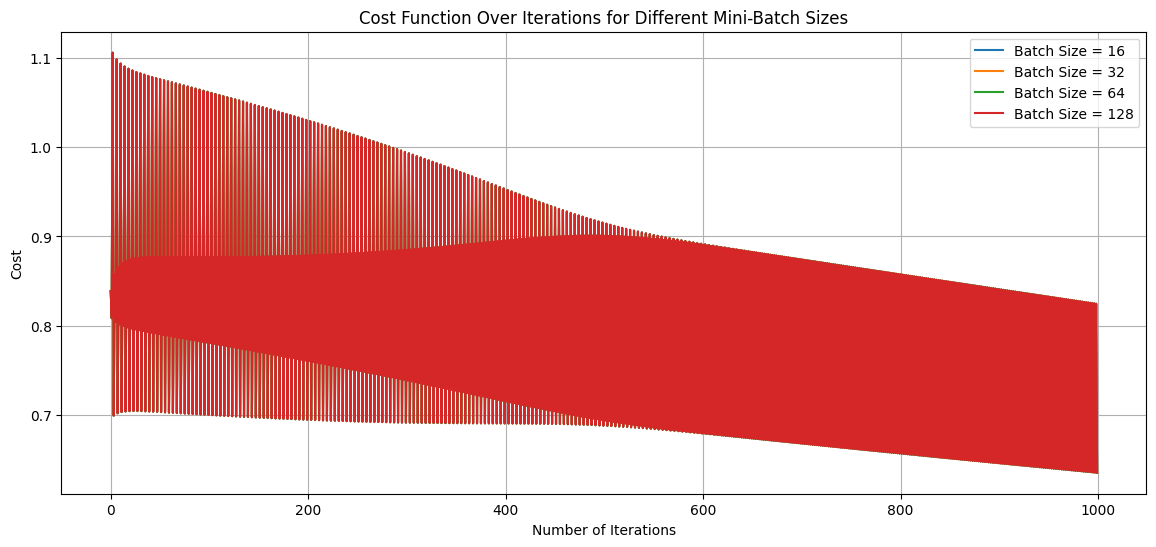

RuntimeError: matplotlib does not support generators as input

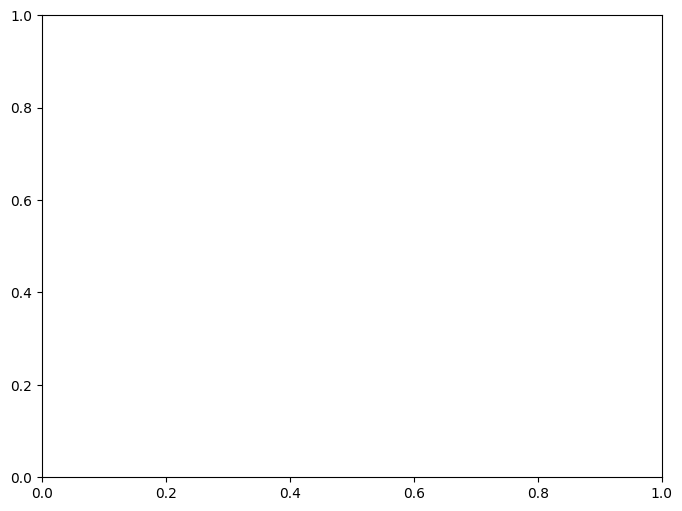

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = 1/m * np.dot(X.T, (h - y))
    return gradient

def mini_batch_gradient_descent(X, y, theta, alpha, num_iters, batch_size):
    m = len(y)
    costs = []
    for _ in range(num_iters):

        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            gradient = compute_gradient(X_batch, y_batch, theta)
            theta -= alpha * gradient

        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs


X = np.array([[1, 22], [1, 25], [1, 30], [1, 35], [1, 40], [1, 45], [1, 50]])
y = np.array([0, 0, 0, 1, 1, 1, 1])

batch_sizes = [16, 32, 64, 128]
num_iters = 1000
alpha = 0.01

plt.figure(figsize=(14, 6))

for batch_size in batch_sizes:

    theta = np.zeros(X.shape[1])

    theta, costs = mini_batch_gradient_descent(X, y, theta, alpha, num_iters, batch_size)


    plt.plot(range(num_iters), costs, label=f'Batch Size = {batch_size}')


plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations for Different Mini-Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()


final_costs = []
for batch_size in batch_sizes:

    theta = np.zeros(X.shape[1])

    _, costs = mini_batch_gradient_descent(X, y, theta, alpha, num_iters, batch_size)

    final_costs.append(costs[-1])

plt.figure(figsize=(8, 6))
plt.bar(map(str, batch_sizes), final_costs, color='skyblue')
plt.xlabel('Mini-Batch Size')
plt.ylabel('Final Cost')
plt.title('Final Cost for Different Mini-Batch Sizes')
plt.grid(True)
plt.show()


# EXPERIMENT 6


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.3880 - val_loss: 0.1916
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1807 - val_loss: 0.1532
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1489 - val_loss: 0.1334
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1314 - val_loss: 0.1215
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1208 - val_loss: 0.1133
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1129 - val_loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1074 - val_loss: 0.1029
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1034 - val_loss: 0.0996
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1004 - val_loss: 0.0974
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

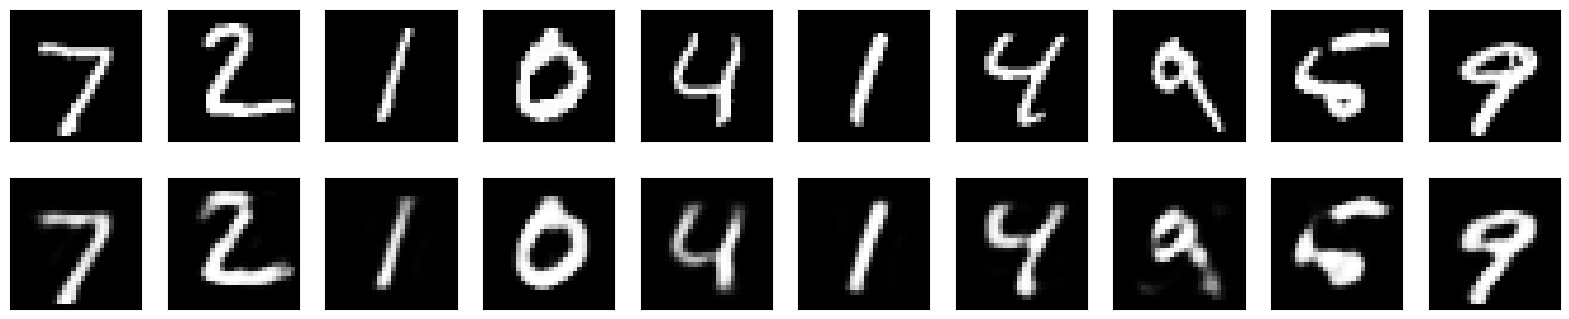

In [ ]:
import keras
from keras import layers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),
np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Sample dataset
dataset = [
    "natural language processing is a field of computer science",
    "word embeddings are used in natural language processing tasks",
    "deep learning models have revolutionized natural language processing",
    "word2vec is a popular technique for generating word embeddings"
]
# Tokenize the dataset into words
tokenized_dataset = [text.split() for text in dataset]

# Train word2vec model
model = Word2Vec(tokenized_dataset, vector_size=100, window=5,
min_count=1, workers=4)

# Test the word embeddings
print("Similarity between 'word' and 'embeddings':",
model.wv.similarity('word', 'embeddings'))
print("Most similar words to 'word':",
model.wv.most_similar('word'))

Similarity between 'word' and 'embeddings': 0.019159097
Most similar words to 'word': [('science', 0.16699635982513428), ('a', 0.13885433971881866), ('is', 0.13150468468666077), ('revolutionized', 0.09771139174699783), ('learning', 0.07175446301698685), ('processing', 0.06410364806652069), ('field', 0.060617249459028244), ('deep', 0.047680601477622986), ('for', 0.04408745467662811), ('used', 0.04276478663086891)]


Saving images.jpg to images (2).jpg


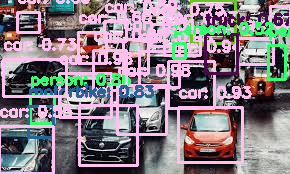

In [ ]:
# Download YOLO weights, configuration, and class names
!wget -q https://pjreddie.com/media/files/yolov3.weights
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

# Load YOLO model and class labels
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to perform object detection
def detect_objects(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read the image.")
        return

    height, width, _ = image.shape

    # Prepare input blob for the network
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run forward pass through the network
    output_layers_names = net.getUnconnectedOutLayersNames()
    outputs = net.forward(output_layers_names)

    # Process detections
    boxes, confidences, class_ids = [], [], []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Confidence threshold
                center_x, center_y = int(detection[0] * width), int(detection[1] * height)
                w, h = int(detection[2] * width), int(detection[3] * height)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-max suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    # Draw bounding boxes and labels
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, f"{label}: {confidences[i]:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image with detected objects
    cv2_imshow(image)

# Upload an image file
uploaded = files.upload()

# Get the uploaded image filename
image_path = "images.jpg"  # Retrieves the first uploaded file's name

# Perform object detection on the image
detect_objects(image_path)


x values: [0.        0.1010101 0.2020202 0.3030303 0.4040404]
y values: [3.         3.2020202  3.4040404  3.60606061 3.80808081]


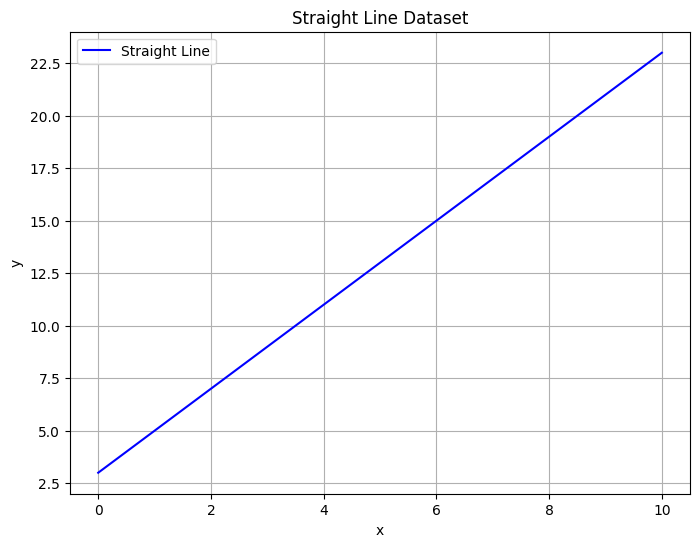

In [ ]:
import numpy as np

# Parameters for the straight-line equation y = mx + c
m = 2  # Slope
c = 3  # Intercept

# Generate x values
x_values = np.linspace(0, 10, 100)

# Generate corresponding y values for the straight line
y_values = m * x_values + c

# Display the first few points
print("x values:", x_values[:5])
print("y values:", y_values[:5])

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Straight Line", color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Straight Line Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape x_values for LSTM input (samples, timesteps, features)
X = x_values.reshape(len(x_values), 1, 1)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y_values, epochs=1000, verbose=1)

# Predict the y values
predicted_y_values = model.predict(X, verbose=0)

# Plot the original and predicted straight line
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Original Straight Line",
color='blue')
plt.plot(x_values, predicted_y_values, label="Predicted Straight Line",
color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original and Predicted Straight Lines')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'x_values' is not defined